### Example: `sglib.HMM`


In [1]:
import sys 
sys.path.append('../')

import matplotlib.pyplot as plt

from sglib.methods.parametric.hmm import HMM
from sglib.utils import load_example_data


In [5]:
Q_obs = load_example_data()
test_Q = Q_obs.iloc[:, 1].resample('A').sum().values

model = HMM(test_Q, 
            n_hidden_states=2, n_realizations=10, 
            max_iter=1000, tolerance=1e-8, 
            log_transform=True)
model.fit()

Q_syn = model.generate()


Using default value False for kwarg deseasonalize.
Using default value False for kwarg standardize.
Using default value False for kwarg normalize.
Using default value 100 for kwarg n_timesteps.
Using default value 1 for kwarg timestep.
Using default value False for kwarg _is_fit.
Using default value False for kwarg verbose.


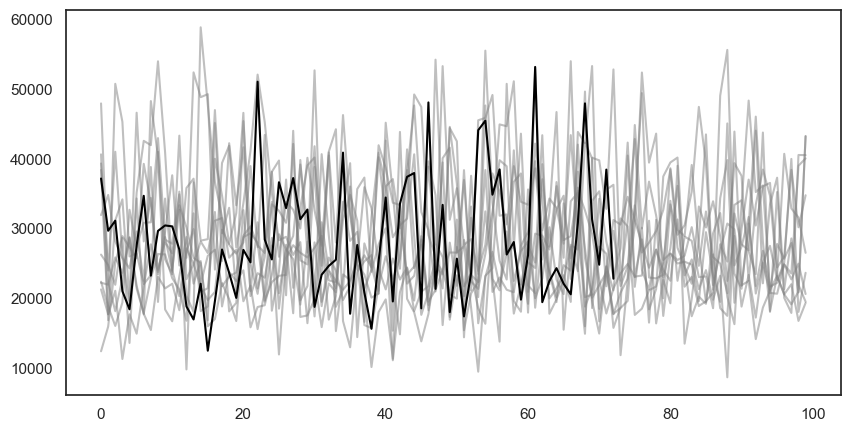

In [6]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1,figsize=(10,5))
for i in range(Q_syn.shape[1]):
    ax.plot(Q_syn[:,i], alpha = 0.5, color='grey')
ax.plot(test_Q, color='black', label='observed')

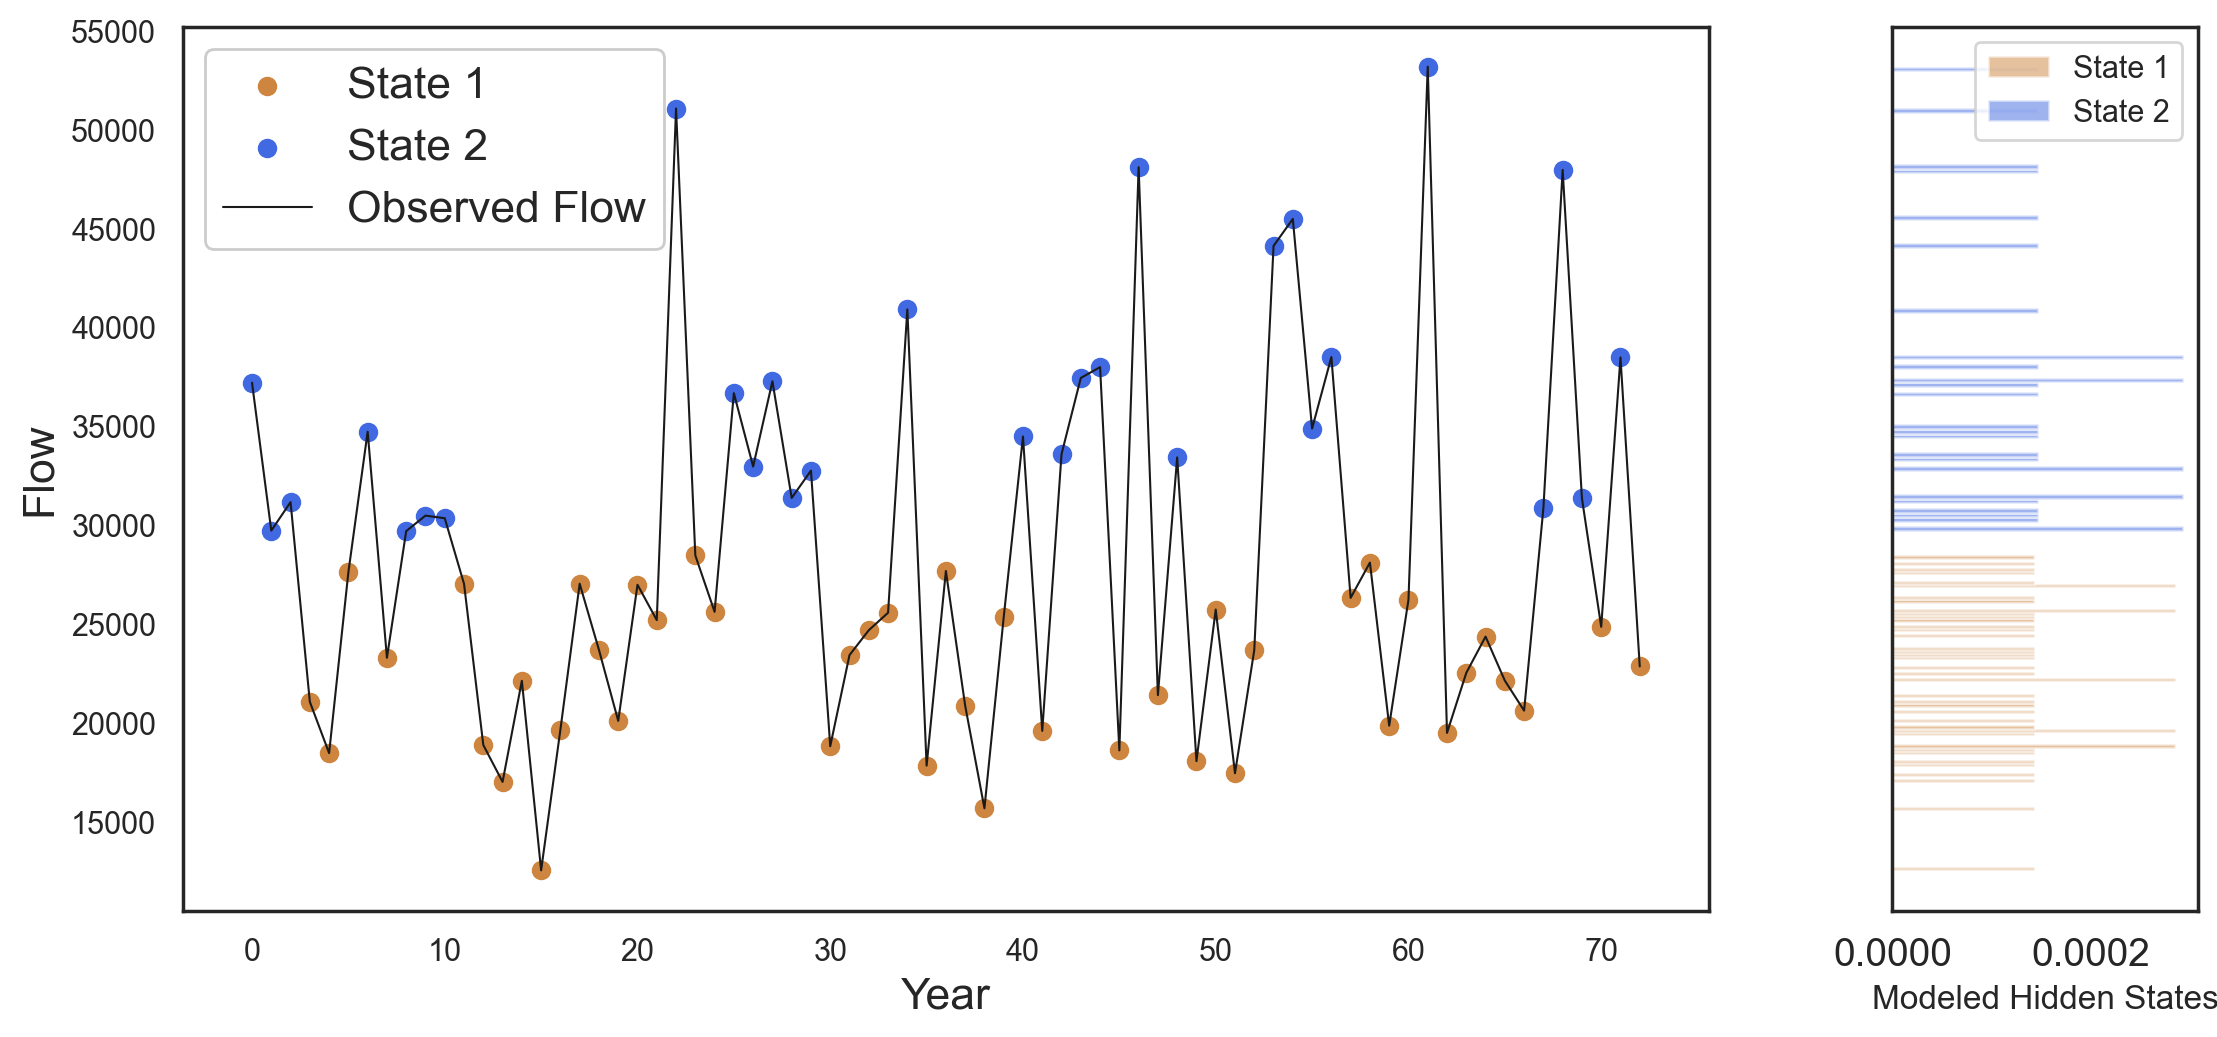

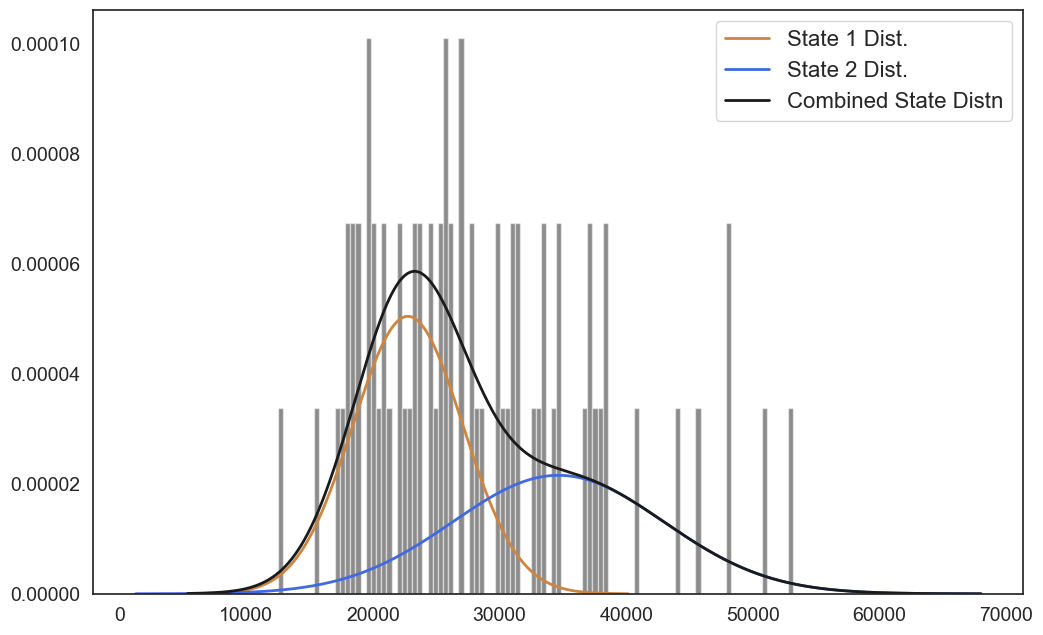

In [7]:
model.plot()

model.plot(kind='dist')